theta_o: 2.174263670861015
beta:    0.5276151065383767
omega:   3.8010934812099393
phi:     5.839631418223082
phi_l:  -0.7633377066483676


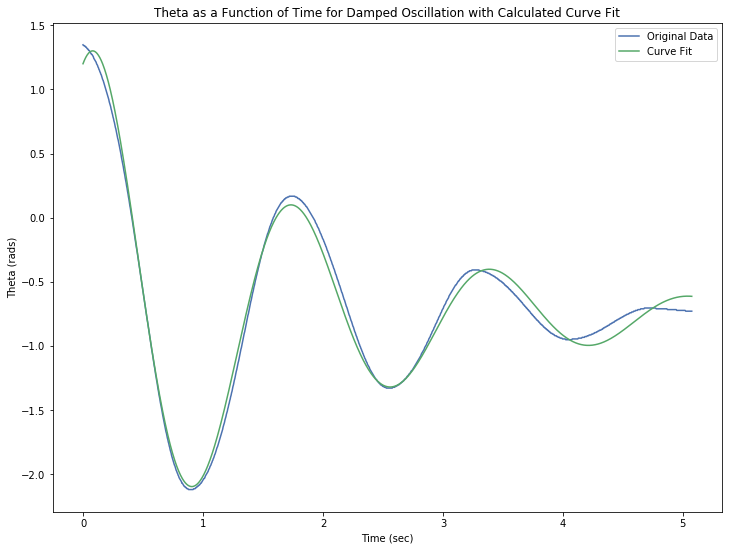

In [34]:
'''
    This script reads in a txt file that contains time and its corresponding theta measurement. It then plots
    this relation on a graph. A theoretical equation is then fitted to the data by using scipy.optimize.curve_fit
    to find the parameters to give the relation the data gives.
'''

import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import math

# Set up lists and give initial guess to our parameters. The initial guess does not really matter.
# Constants
theta_o = 1.0
beta = 1.0
omega = 1.0
phi = 1.0
phi_l = 1.0
dataListTime = []
dataListTheta = []
dataListTheoretical = []
dataListCurveFit = []

# This functions takes in a time t, and then 4 float parameters. It then calculates the angle theta in rads
# and outputs it.
def theoretical(t, theta_o, beta, omega, phi, phi_l):
    return theta_o*np.exp(-beta*t)*np.cos(omega*t + phi) + phi_l



# Script

# Extract time and theta columns from data file and puts them in their lists
file = open("damped_oscillation.txt",'r') 
next(file)
for line in file:
    time, theta = line.split()
    dataListTime.append(float(time))
    dataListTheta.append(float(theta))
    
    
# Scipy.optimize.curve_fit takes in the equation we want to fit the data to, the time list, the data that the equation
# needs to be fit to, and then all the parameters that the function takes that need to be calculated.
sol = scipy.optimize.curve_fit(theoretical, dataListTime, dataListTheta, p0=[theta_o, beta, omega, phi, phi_l])

# gets the list of parameter values from the solution given by scipy.optimize
ans, cov = sol
fit_theta_o, fit_beta, fit_omega, fit_phi, fit_phi_l = ans
# Prints the fit values
print("theta_o: " + str(ans[0]) + "\nbeta:    " + str(ans[1]) + "\nomega:   " + str(ans[2])+ "\nphi:     " + str(ans[3])
     + "\nphi_l:  " + str(ans[4]))

# Makes the curveFit list so that we can plot it.
for t in dataListTime:
    dataListCurveFit.append(theoretical(t,fit_theta_o, fit_beta, fit_omega, fit_phi, fit_phi_l))

# Graph Figure, plots both the original data from the txt file and the curve fit list that was calculated
plt.style.use('seaborn-deep')
fig= plt.figure(figsize=(12,9))
plt.plot(dataListTime, dataListTheta, label='Original Data')
plt.plot(dataListTime, dataListCurveFit, label='Curve Fit')
plt.title('Theta as a Function of Time for Damped Oscillation with Calculated Curve Fit')
plt.xlabel("Time (sec)")
plt.ylabel("Theta (rads)")
plt.legend()
plt.show()
